# Approximation du nombre $\pi$ par la méthode de Monte-Carlo

## Présentation de l'activité
- **Niveau de classe :** 
 - Classe de première de la voie générale (spécialité mathématiques)
 - Classe de première de la voie technologique (tronc commun).
- **Référence au programme :** 
 - Spécialité mathématiques de première générale: *Méthode de Monte Carlo : estimation du nombre $\pi$*.
- **Description :** Activité de découverte d'un méthode probabiliste d'estimation : la méthode de Monte-Carlo. Le but ici est d'estimer l'aire du quart de disque de rayon $1$ afin d'obtenir une approximation du nombre $\pi$.

## Objectifs
Il est courant d'utiliser des nombres aléatoires pour estimer des quantités numériques. Nous allons ici utiliser des variables aléatoires de loi uniforme afin d'estimer le nombre $\pi$. 
Pour cela nous allons:
- générer des points aléatoirement et uniformément dans un carré de coté 1;
- calculer la proportion de points situés en dessous du quart de cercle de rayon 1. Cela nous permettra de donner une estimation de son aire;
- approcher le nombre $\pi$ sachant que l'aire d'un quart de disque de rayon 1 est $\frac{\pi}{4}$. 

![Monte Carlo](img/monteCarlo.png "Méthode de Monte Carlo")

## Estimation
La fonction `random` de la librairie `random` permet de générer un nombre aléatoirement et uniformément entre 0 et 1.

In [1]:
from random import random as rd

nbPoints = 1000

s = 0
for i in range(nbPoints):
    x,y = rd(),rd()
    if x**2+y**2<1:
        s=s+1
estimPi = 4*s/nbPoints

print(estimPi)

3.108


<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Expliquer un programme** 
 - Que représente la variable `s` ? 
 - Expliquer la ligne 8.
 
* **Compléter un programme** 

    - Le programme précédent étant fourni en remplaçant la ligne 8 par `if ...`, demander aux élèves de compléter la ligne 8. 
    - Le programme précédent étant fourni en remplaçant la ligne 10 par `estimPi = ...`, demander aux élèves de compléter la ligne 10. 
* **Écrire un programme**

    Écrire un programme générant des points de coordonnées aléatoires entre 0 et 1 et comptant la proportion de points situés dans le disque de centre $(0,0)$ et de rayon $0,5$
* **Tester** l'estimation du nombre $\pi$ pour différents nombres de points générés.

## Convergence
Nous allons maintenant utiliser les listes afin de stocker au fur et à mesure des estimations de $\pi$ obtenues en faisant varier le nombre de points générés.


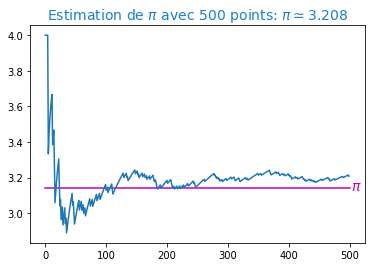

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

### cte ###
N=500
    
estimation = []
somme = 0
for i in range(N):
    (x,y) = (rd(),rd())
    if x**2+y**2<1:
        somme = somme + 1
    estimation.append(4*somme/(i+1))

plt.plot([0,N],[3.14,3.14],color='m')
plt.text(N+2,3.13,"$\pi$",color='m',fontsize=14)
plt.title("Estimation de $\pi$ avec {} points: $\pi\simeq${}".format(N,estimation[-1]),color="#1e7fcb",fontsize=14)
plt.plot(estimation)
plt.show()

   


<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Expliquer un programme**

    Que contient la liste `estimation` ?
 
* **Compléter un programme**

    Le programme précédent étant fourni en remplaçant la ligne 13 par `estimation.append(...)`, demander aux élèves de compléter la ligne 13.

## Animation susceptible d'être présentée aux élèves
L'animation suivante permet d'illustrer la méthode de Monte Carlo. Des points sont choisis aléatoirement, s'ils sont dans le quart de cercle, ils prennent la couleur verte, sinon ils prennent la couleur rouge. La figure de droite illustre comment la fréquence de points verts approche $\pi$.

In [ ]:
import matplotlib.animation
from IPython.display import HTML

#cte
N = 200

#paramètres figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6))
ax1.set_xlim(( 0, 1))
ax1.set_ylim((0, 1))
ax2.set_xlim(( 0, N))
ax2.set_ylim((1.9, 4.1))
ax1.set_aspect('equal')
ax2.set_aspect(N//4)

Xin,Yin,Xout,Yout = [],[],[],[]
somme = 0
pis = []
pointsIn, = ax1.plot([],[],'go')
pointsOut, = ax1.plot([],[],'ro')
estimation = ax2.text(N//2-N//4,1.2,'Estimation',color="#1e7fcb",fontsize=14)
courbe, = ax2.plot([],[])

def init():
    pointsIn.set_data([], [])
    pointsOut.set_data([], [])
    estimation.set_text("0")
    courbe.set_data([], [])
    circle1 = plt.Circle((0, 0), 1, color='gray', alpha=0.1)
    ax1.add_artist(circle1)
    ax2.plot([0,N],[3.14,3.14],'m-')
    ax2.text(N+0.5,3.1,'$\pi$',color="m",fontsize=14)    
    ax2.set_title('4 x Proportion de points dans le quart de disque')
    return (pointsIn,) 

def animate(i):
    global somme
    x,y = rd(),rd()
    if x**2+y**2<1:
        somme +=1
        Xin.append(x)
        Yin.append(y)
        pointsIn.set_data([Xin,Yin])
    else:
        Xout.append(x)
        Yout.append(y)
        pointsOut.set_data([Xout,Yout])
    pis.append(4*somme/(i+1))   
    estimation.set_text("$\pi\simeq${} avec {} points".format(int(1000*pis[i])/1000,i+1))
    courbe.set_data(range(i+1),pis)
    return (pointsIn,)
plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N,init_func=init,blit=True)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())

<div class="alert alert-warning">

Remarque

</div>

Il peut être intéressant d'utiliser la courbe en mode 'pas à pas' pour montrer aux élèves que lorsqu'un point vert apparaît la courbe monte et que lorsqu'un point rouge apparaît, elle descend.